In [1]:
# import libraries
from vpython import *
import numpy as np
import robotics_library as rbl
import matplotlib.pylab as plt
%matplotlib inline
from keras.models import load_model
import copy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Using TensorFlow backend.


### visualization functions

In [2]:
def draw_background():
    scene = canvas(background=color.black, up=vector(-1, -1, 0), height=600, center=vector(0, 0, 0))
    scene.camera.pos = vector(3.5, 3.5, 10)
    scene.camera.axis = vector(-3.5, -3.5, -10)
    
    # plot the axises
    axis_length = 3
    x = arrow(pos=vector(0,0,0), axis=vector(axis_length,0,0), shaftwidth=0.1, color=color.red)
    text(text='x', pos=vector(axis_length,0,0), axis=vector(axis_length,0,0))
    y = arrow(pos=vector(0,0,0), axis=vector(0,axis_length,0), shaftwidth=0.1, color=color.green)
    text(text='y', pos=vector(0,axis_length,0), axis=vector(0,axis_length,0))
    z = arrow(pos=vector(0,0,0), axis=vector(0,0,-axis_length), shaftwidth=0.1, color=color.blue)
    text(text='-z', pos=vector(0,0,-axis_length), axis=vector(0,0,-axis_length))
    return(scene)

def draw_robotics(joint_locs, objects2delete=[]):
    
    # delete the old positions
    for obj in objects2delete:
        obj.visible = False
        del obj 

    # color list
    color_list = [color.cyan, color.yellow, color.magenta, color.orange, vector(0.7, 0.2, 0.1),
                  vector(0.2, 0.1, 0.7), vector(0.7, 0.7, 0.8)]
    
    # draw the links
    curve_list = [[] for _ in xrange(len(joint_locs))] # container to store the objects that make up the robot
    curve_list[0] = curve(pos=[vector(0, 0, 0), vector(*joint_locs[0, :3])], radius=0.5)

    for idx in xrange(1, len(joint_locs), 1):
        p0 = vector(*joint_locs[idx-1, :3])
        p1 = vector(*joint_locs[idx, :3])
        curve_list[idx] = curve(pos=[p0, p1], color=color_list[idx])
        
        
    end_effector = box(pos=vector(*joint_locs[-1, :3]), length=0.7, height=0.2, width=0.3)
    curve_list.append(end_effector)

    return(curve_list)

In [4]:
env_name = "2d"
env_obj = rbl.Env2D()
model_name = env_name + "_working.h5"
q_object = load_model(model_name)
print(env_obj.hoop_size)

4


In [5]:
new_obj = copy.deepcopy(env_obj)
new_obj.hoop_size = 2
print(env_obj.hoop_size, new_obj.hoop_size)

(4, 2)


In [8]:
# link_lengthes = [1, 3, 1, 1, 1, 1, 1]
# initial_angles = [0, 0, 0, 0, -np.pi/4, 0]
# initial_angular_velocities = np.zeros(env_obj.num_joints)

# initial_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

In [9]:
ee_trj_list, ee_pos, ee_speed, reward, score = rbl.test_q_function(q_object, 
                                                                   env_obj)

('Successful throw!!!', 0.74157756457690016)
()
('Successful throw!!!', 0.12326510362741784)
()
('Successful throw!!!', 0.29827204382440575)
()
('Successful throw!!!', 0.53334825973066158)
()
('Successful throw!!!', 0.72651157964132362)
()
('Successful throw!!!', 0.56301079572873336)
()
('Successful throw!!!', 0.7140648254496067)
()
('Successful throw!!!', 0.77547369135250765)
()
('Successful throw!!!', 0.75261960873215206)
()
('Successful throw!!!', 0.80188560603538162)
()
('Successful throw!!!', 0.29940879444282442)
()
('Successful throw!!!', 0.34685812663885912)
()
('Successful throw!!!', 0.36215241952045274)
()
('Successful throw!!!', 0.066969588138398123)
()
('Successful throw!!!', 0.7657164709397325)
()


In [16]:
print(zip(score, ee_speed))

[(0.0, array([ 40.43186551,  12.09932151,   1.03913257,   0.        ])), (0.0, array([ 49.60390764,   2.51730972,  -0.14936867,   0.        ])), (0.0, array([ 13.37620425,   4.45408062,  -0.02792515,   0.        ])), (0.0, array([ 48.64799512,  -7.69600906,  -1.55121203,   0.        ])), (1.0, array([ 10.21017612,   0.        ,   0.        ,   0.        ])), (0.0, array([ 26.71401174,   4.45233529,   0.        ,   0.        ])), (0.0, array([ 10.47545702,   3.66868239,   1.06115556,   0.        ])), (0.0, array([ 38.50545714,   8.50147872,   0.        ,   0.        ])), (0.0, array([ 44.41847577, -16.74562141,   2.07926518,   0.        ])), (1.0, array([ 37.68861811,   0.04188791,   0.05235988,   0.        ])), (0.0, array([ 14.579444  ,  -3.78042159,   3.5379787 ,   0.        ])), (0.0, array([ 3.19796955, -0.63141125, -0.17065178,  0.        ])), (1.0, array([ 8.64985177,  0.        ,  0.        ,  0.        ])), (0.0, array([ 48.62239836, -23.90057314,  -2.00602661,   0.        ])),

In [8]:
print(reward)
print(score)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


1.2039728043259361

## test the ball object

In [36]:
env_name = "2d"
env_obj = rbl.env_dict[env_name]
tmp_ball = rbl.Ball([0, 3, 2], [2.5, 0, 10], env_obj)
ball_trajectories = tmp_ball.update()

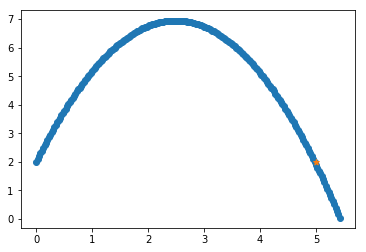

0.025


In [37]:
plt.scatter(ball_trajectories[:, 0], ball_trajectories[:, 2])
plt.scatter(env_obj.hoop_position[0], env_obj.hoop_position[2], marker="*")
plt.show()
print(tmp_ball.min_dist_to_hoop)

In [38]:
a = ball_trajectories[:, [0, 2]] - env_obj.hoop_position[[0, 2]]
dist = [np.linalg.norm(item, ord=2) for item in a]

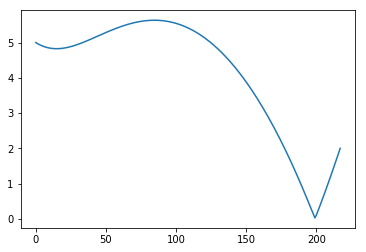

In [39]:
plt.plot(dist)

## test generate trajectory function

In [41]:
env_name = "2d"
model_name = env_name + ".h5"
data_name = env_name + ".npz"
env_obj = rbl.env_dict[env_name]

# create an initial object
link_lengthes = [1, 3, 1, 1, 1, 1, 1]
initial_angles = [0, 0, 0, 0, -np.pi/4, 0]
initial_angular_velocities = np.zeros(env_obj.num_joints)

initial_rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

## test the end-effector speed calculation

In [40]:
env_name = "2d"
env_obj = rbl.env_dict[env_name]

In [18]:
link_lengthes = [1, 3, 1, 1, 1, 1, 1]
initial_angles = [0, 0, 0, 0, -np.pi/2, 0]
num_rotations = len(initial_angular_velocities)
initial_angular_velocities = np.zeros(env_obj.num_joints)
rm = rbl.Robotic_Manipulator_Naive(link_lengthes, initial_angles, initial_angular_velocities)

## test movements joint-by-joint

In [14]:
max_rotation = np.pi / 2
num_steps = 20
rotation_angles = np.concatenate((np.linspace(0, max_rotation, num=num_steps), 
                                np.linspace(max_rotation, 0, num=num_steps),
                                np.linspace(0, -max_rotation, num=num_steps),
                                np.linspace(-max_rotation, 0, num=num_steps)))
num_angles = len(rotation_angles)
# draw initial configuration of the robot
qs = np.zeros(num_rotations)
rm.configure_robots(qs)
draw_background()
objs2delete = draw_robotics(rm.joint_abs_locations)

for idx in xrange(num_rotations):
    for idj in xrange(num_angles):
        rate(20)
        qs[idx] = rotation_angles[idj]
        rm.configure_robots(qs)
        objs2delete = draw_robotics(rm.joint_abs_locations, objs2delete)

<IPython.core.display.Javascript object>